<a href="https://colab.research.google.com/github/suryamandavilli/Dict-pop-up/blob/master/breast_Cancer_dimension_reduction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [6]:
cancer.keys() # As Cancer dataset is a kind of dictionary we are looking at the keys of it.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
#Then we have to load it into a dataframe to perform other pandas operations.

In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Now that the data is in a Dataframe we need to Standardise the data using StandardScaler((x-mean)/standard_deviation)

Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
# Let's fit the 30 dimensions data into the scaler

In [16]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

Orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

And that orthogonal transformation is what we are applying here.

In [0]:
scaled_data = scaler.transform(df) #Transformed the data with the descending order of variance.

In [0]:
# PCA starts its work from here as the transformed data is ready.

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2) # Of the 30 dimensions we are just choosing two components to get the best outptut

In [22]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(scaled_data) # x-label for the visualisation 

In [25]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

Text(0, 0.5, 'Second PCA')

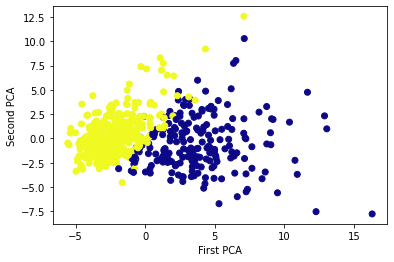

In [34]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'], cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [0]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

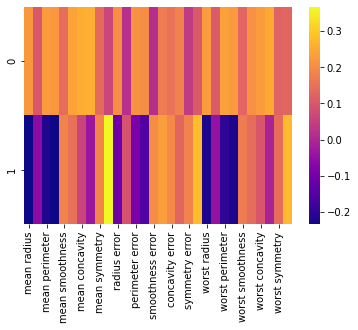

In [36]:
sns.heatmap(df_comp, cmap='plasma')